# ggplot2

In [1]:
install.packages('ggplot2')
library(ggplot2)

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [3]:
head(tips)

total_bill,tip,sex,smoker,day,time,size
16.99,1.01,Female,No,Sun,Dinner,2
10.34,1.66,Male,No,Sun,Dinner,3
21.01,3.50,Male,No,Sun,Dinner,3
23.68,3.31,Male,No,Sun,Dinner,2
24.59,3.61,Female,No,Sun,Dinner,4
25.29,4.71,Male,No,Sun,Dinner,4


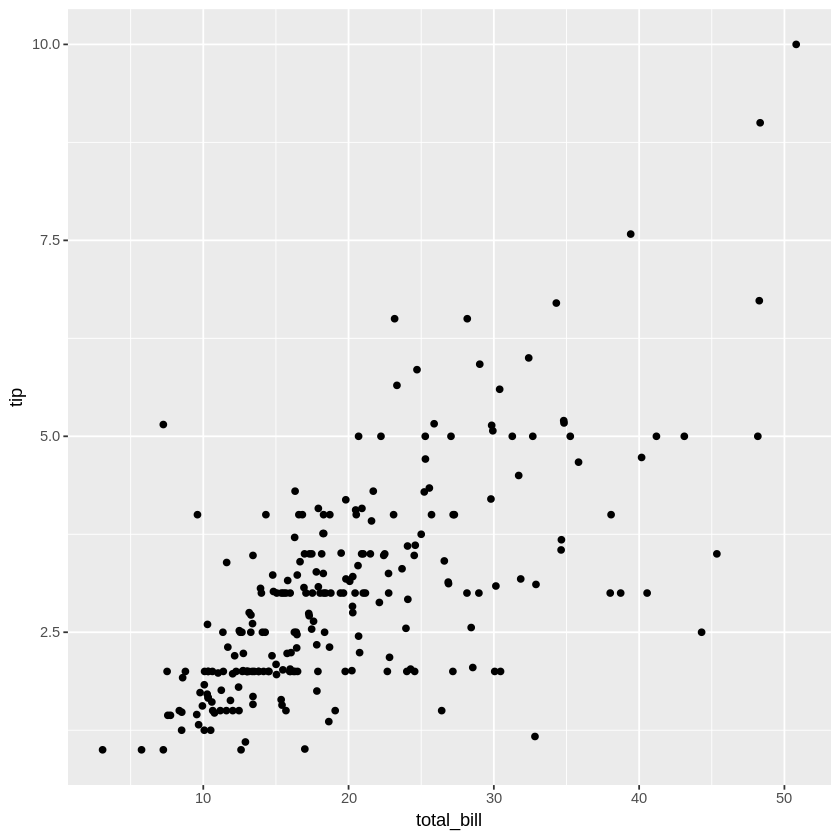

In [7]:
data(tips, package = 'reshape2')
#relationship between total_bill and tip
qplot(total_bill, tip, data = tips, geom = 'point')

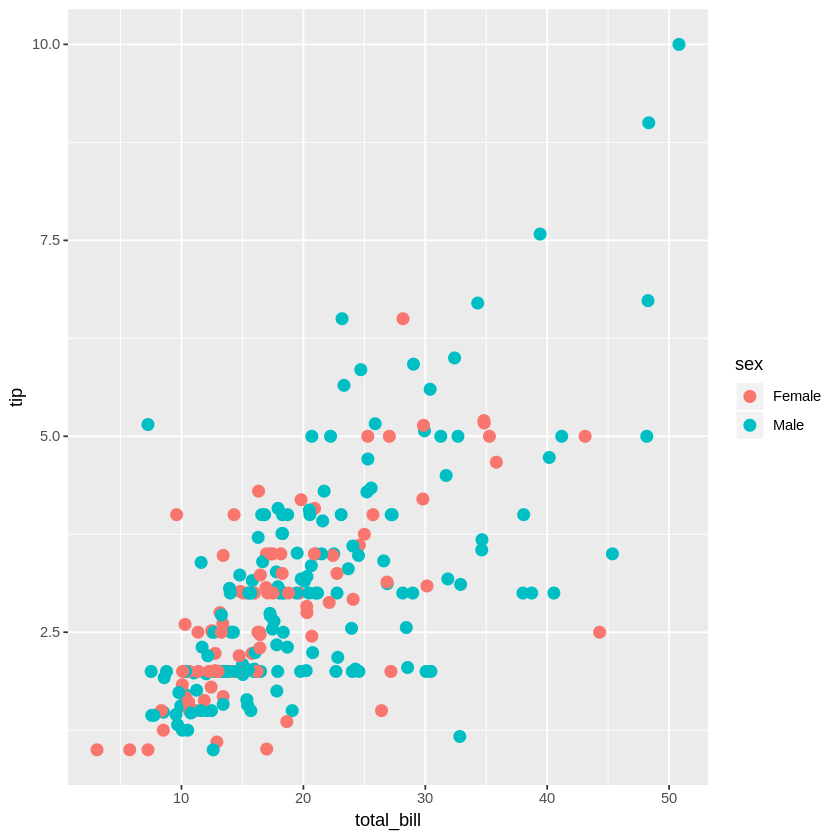

In [9]:
#Grammar of graphics - build layer by layer
layer1 = geom_point(mapping = aes(x = total_bill, y = tip, color = sex),
                   data = tips,
                   size = 3)

ggplot() + layer1

In [10]:
# A regression model!
basic_model = lm(tip ~ total_bill, data = tips)
fit_model = data.frame(total_bill = tips$total_bill, predict(basic_model, interval = 'confidence'))

head(fit_model)

total_bill,fit,lwr,upr
16.99,2.704636,2.569519,2.839753
10.34,2.006223,1.818101,2.194345
21.01,3.126835,2.996732,3.256937
23.68,3.407250,3.266528,3.547972
24.59,3.502822,3.356301,3.649344
25.29,3.576340,3.424725,3.727955


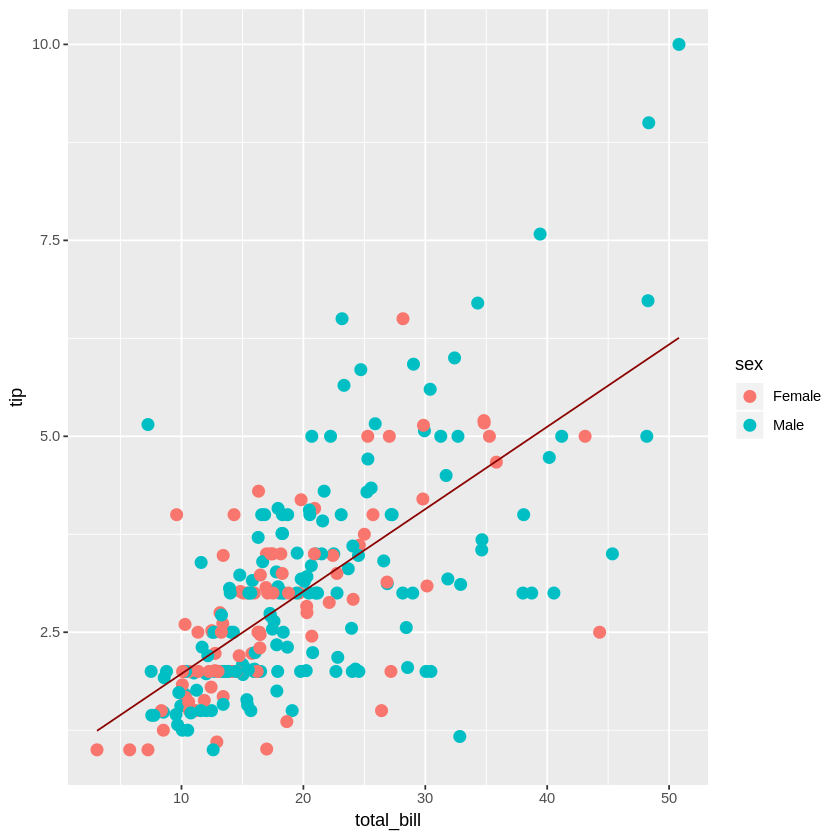

In [11]:
layer2 = geom_line(
    mapping = aes(x = total_bill, y = fit),
    data = fit_model,
    color = 'darkred'
)

ggplot() + layer1 + layer2

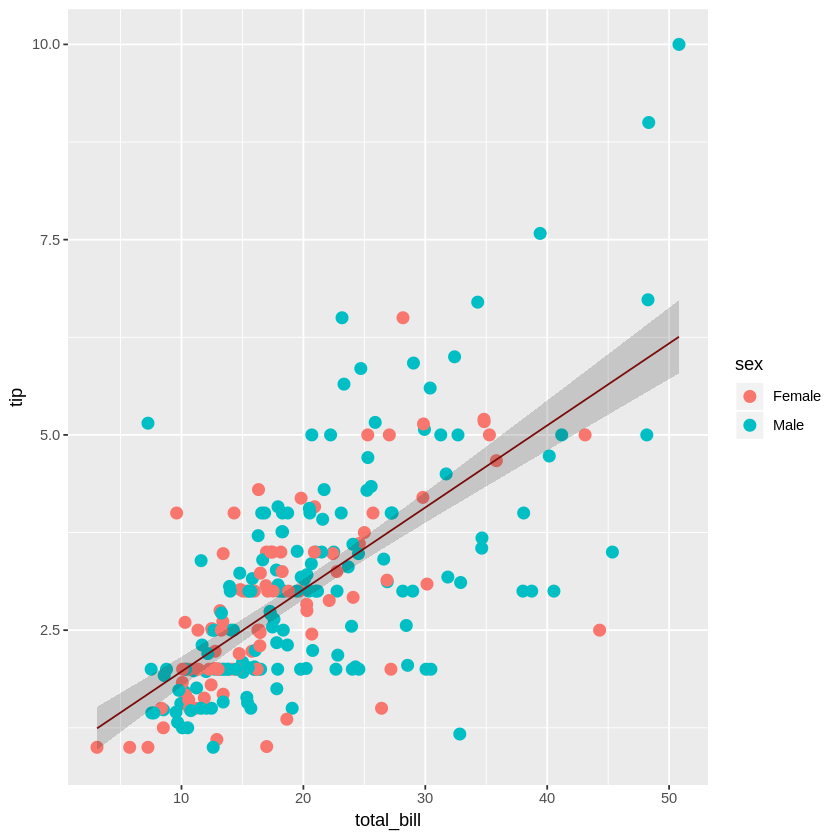

In [16]:
layer3 = geom_ribbon(
    mapping = aes(x = total_bill, ymin = lwr, ymax = upr),
    data = fit_model,
    alpha = 0.2
)

ggplot() + layer1 + layer2 + layer3

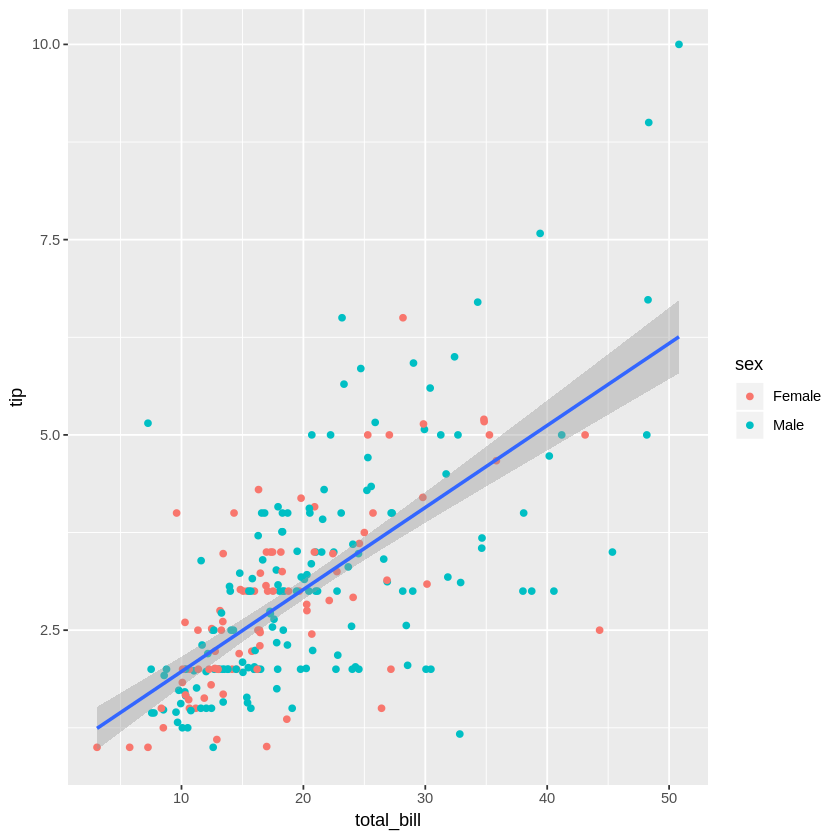

In [18]:
# Otimized version
ggplot(tips, aes(x = total_bill, y = tip)) +
geom_point(aes(color = sex)) +
geom_smooth(method = 'lm')

In [19]:
# Assign to a variable
myplot = ggplot(tips, aes(x = total_bill, y = tip)) +
geom_point(aes(color = sex)) +
geom_smooth(method = 'lm')

In [20]:
class(myplot)

[1] "gg"     "ggplot"

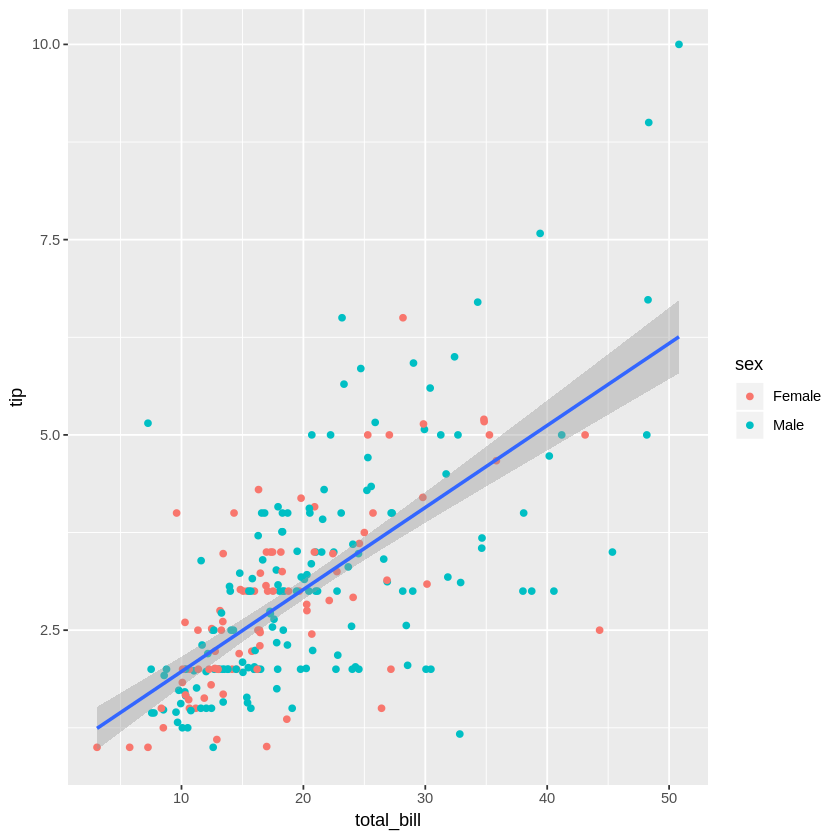

In [21]:
print(myplot)

In [22]:
# Scatterplot with regression line
data = data.frame(cond = rep(c('Obs 1', 'Obs 2'), each = 10),
                 var1 = 1:100 + rnorm(100, sd = 9), 
                 var2 = 1:100 + rnorm(100, sd = 16))
head(data)

cond,var1,var2
Obs 1,-4.2900635,-17.4842201
Obs 1,4.7313366,-1.1831525
Obs 1,5.1855651,-4.6822944
Obs 1,17.9511384,34.8133750
Obs 1,-7.0195146,-22.5169209
Obs 1,0.8043567,-0.1918926


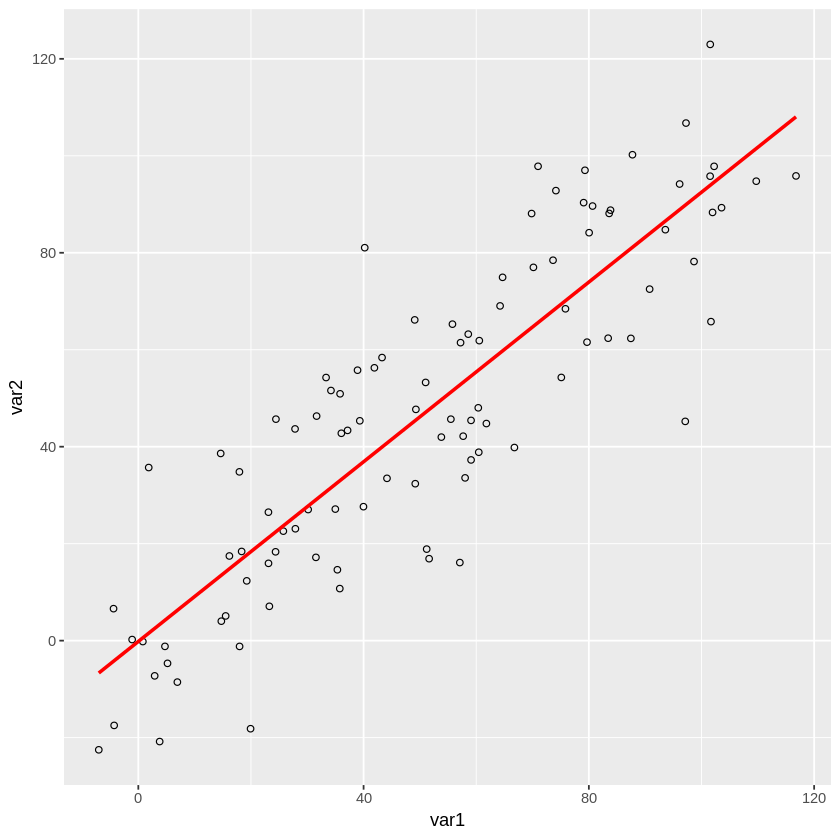

In [25]:
ggplot(data, aes(x = var1, y = var2)) +
geom_point(shape = 1) +
geom_smooth(method = lm, color = 'red', se = F)

In [26]:
# Barplot
data = data.frame(group = c('A','B','C','D'),
                 value = c(33,62,56,67),
                 num_obs = c(100,500,459,342))

data$right = cumsum(data$num_obs) + 30 * c(0:(nrow(data) - 1))
data$left = data$right - data$num_obs

head(data)

group,value,num_obs,right,left
A,33,100,100,0
B,62,500,630,130
C,56,459,1119,660
D,67,342,1491,1149


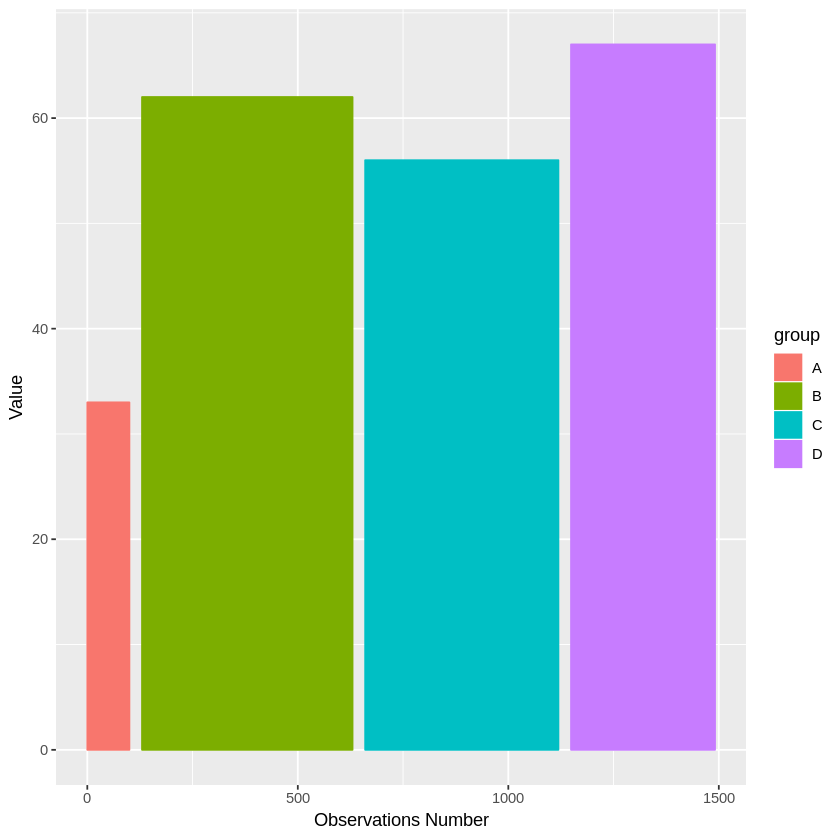

In [27]:
ggplot(data, aes(ymin = 0)) +
geom_rect(aes(xmin = left, xmax = right, ymax = value, colour = group, fill = group)) +
xlab('Observations Number') + 
ylab('Value')

In [28]:
head(mtcars)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


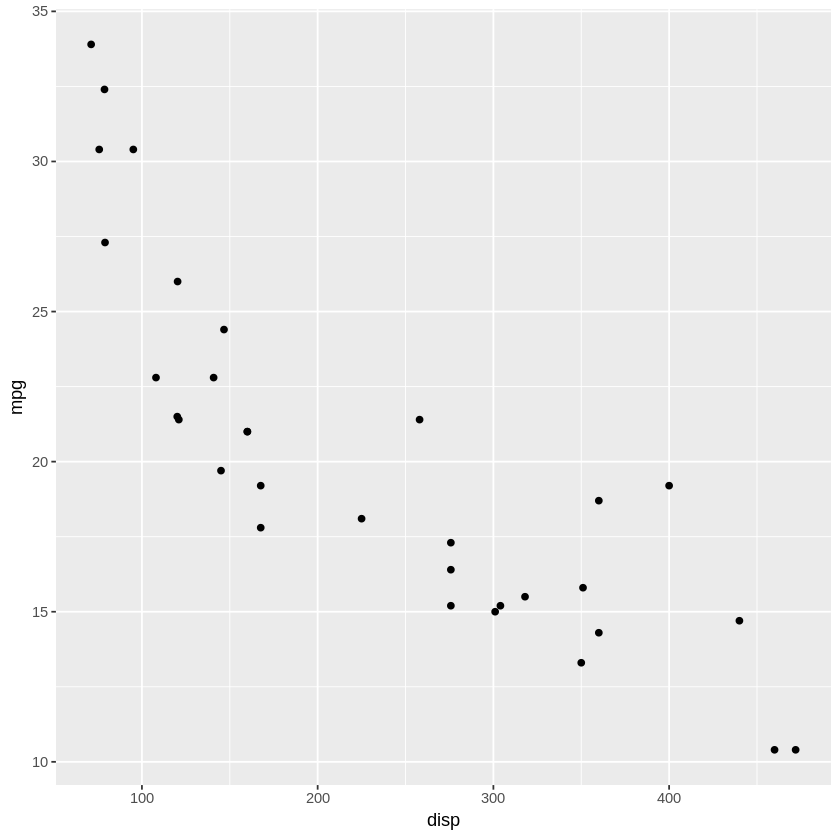

In [29]:
ggplot(data = mtcars, aes(x = disp, y = mpg)) +
geom_point()

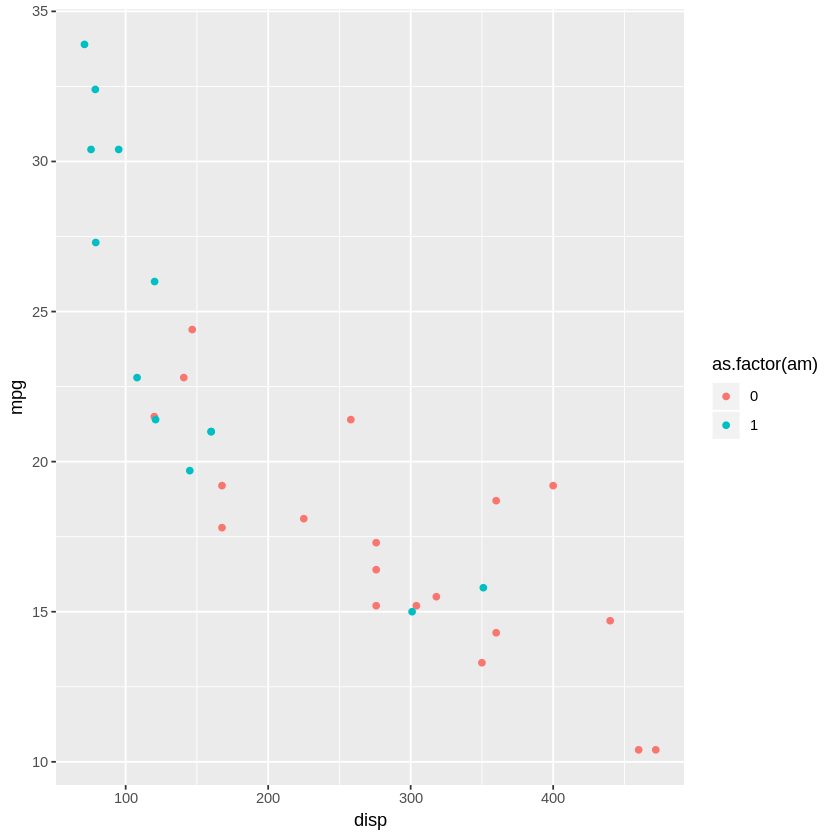

In [30]:
ggplot(data = mtcars, aes(x = disp, y = mpg, colour = as.factor(am))) +
geom_point()

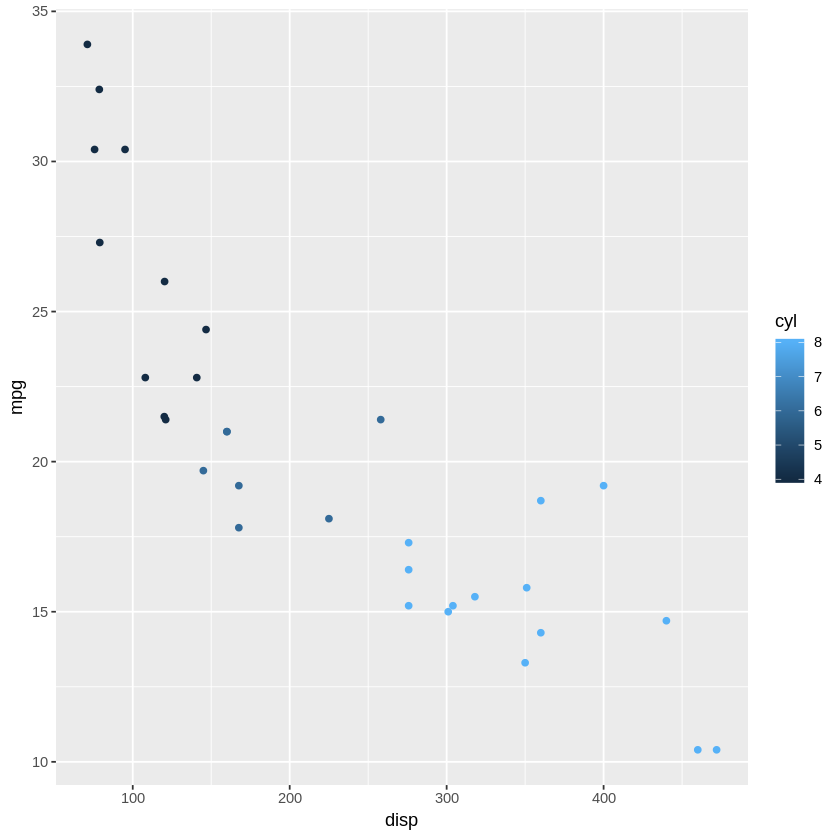

In [31]:
ggplot(data = mtcars, aes(x = disp, y = mpg, colour = cyl)) +
geom_point()

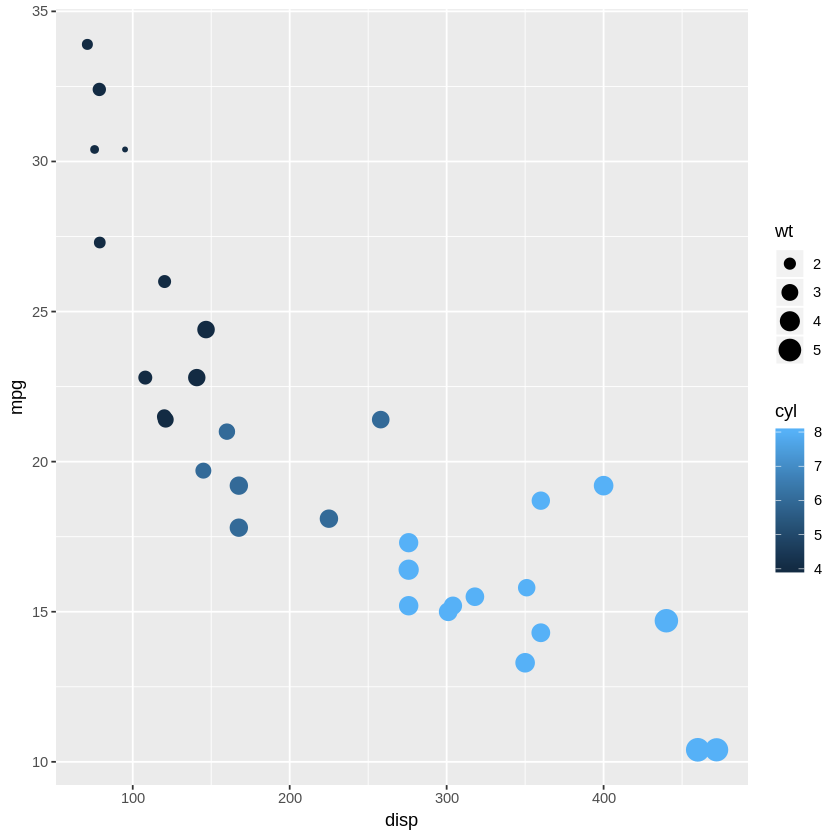

In [33]:
ggplot(data = mtcars, aes(x = disp, y = mpg, colour = cyl, size = wt)) +
geom_point()

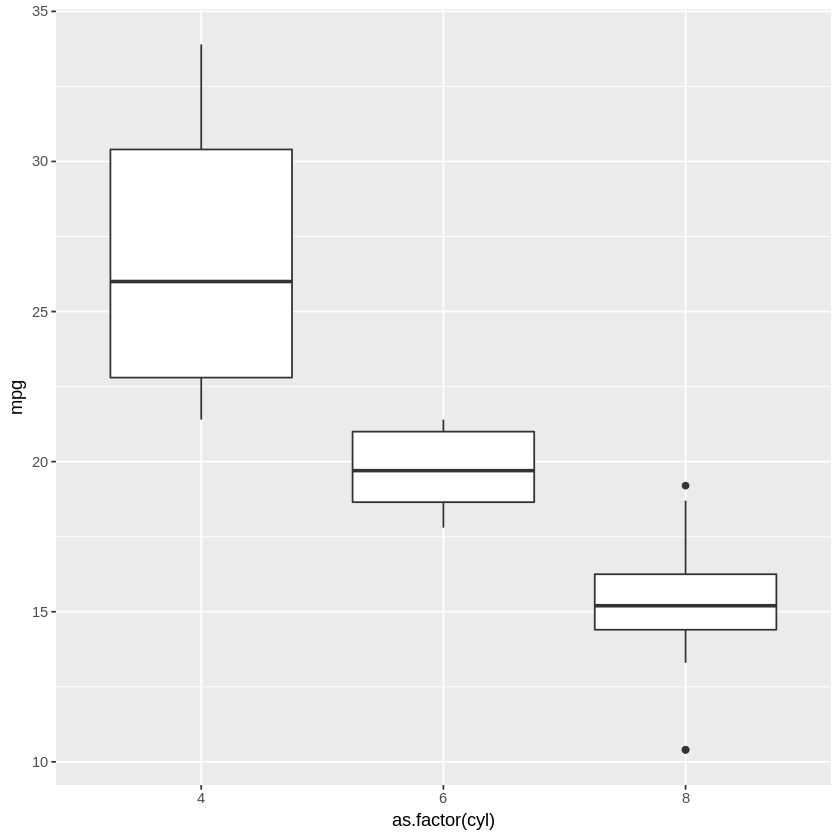

In [34]:
ggplot(mtcars, aes(x = as.factor(cyl), y = mpg)) +
geom_boxplot()

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


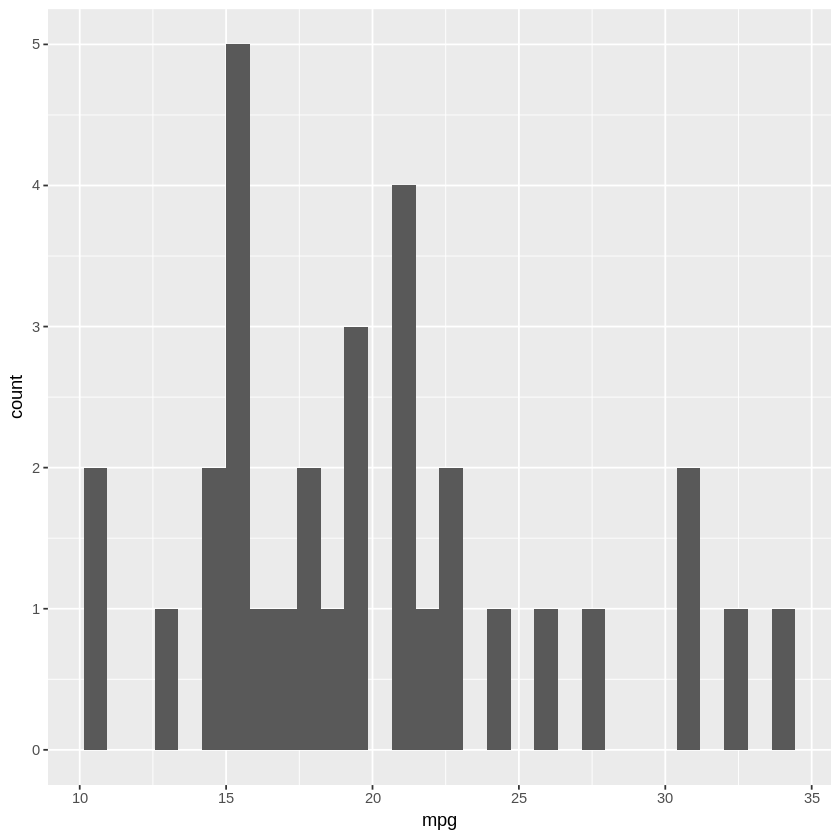

In [39]:
ggplot(mtcars, aes(x = mpg), binwidth = 30) +
geom_histogram()